In [12]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

In [6]:
cd ..

C:\Users\lizba\Desktop\DataViz\autism_machine_learning\asd_machine_learning


# Logistic Regression for 5 of the survey questions

In [13]:
# loading dataset
file = 'Resources/Autism.csv'
df = pd.read_csv(file)
df.head(5)
df.columns
# small 

Index(['Case No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age', 'Sex', 'Ethnicity', 'Jaundice ', 'Family_ASD', 'Residence',
       'Used_App_Before', 'Score', 'Screening Type', 'Language', 'User',
       'Class'],
      dtype='object')

In [14]:
#reshape the data
X =df.drop(columns=["Class","User","Used_App_Before","Case No","Score","Residence","Screening Type","Language","Age","Jaundice ","Ethnicity","Family_ASD","Sex","A10","A2","A3","A4","A7"])
y =df[['Class']].values.reshape(-1,1)
print(X.shape, y.shape)
X.head()

(1118, 5) (1118, 1)


,A1,A5,A6,A8,A9
0,0,0,0,0,0
1,1,1,1,1,1
2,1,1,0,1,0
3,1,1,1,1,1
4,1,0,0,1,0


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# use get dummies to turn catagorical data into 0 and 1 for machine learning
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pd.set_option('display.max_columns', None)
X_train.head()

,A1,A5,A6,A8,A9
361,1,0,0,0,0
1051,1,0,0,0,0
533,0,1,0,1,0
898,1,0,1,1,1
583,1,1,0,0,0


In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Using only 5 of the questions we were able to get a % 90 performance. Implications for this might be that in the future the survey could be shorter, thus easier to complete. 

In [19]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9105011933174224
Testing Data Score: 0.9


In [20]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   ['NO' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'YES' 'NO' 'NO']
First 10 Actual labels: [['YES'], ['NO'], ['NO'], ['YES'], ['YES'], ['NO'], ['NO'], ['YES'], ['NO'], ['YES']]


In [21]:
X_train.head()

,A1,A5,A6,A8,A9
361,1,0,0,0,0
1051,1,0,0,0,0
533,0,1,0,1,0
898,1,0,1,1,1
583,1,1,0,0,0


# Feature Importance

Feature: A1, Score: 1.35480
Feature: A5, Score: 2.36177
Feature: A6, Score: 1.98770
Feature: A8, Score: 1.20416
Feature: A9, Score: 2.16455


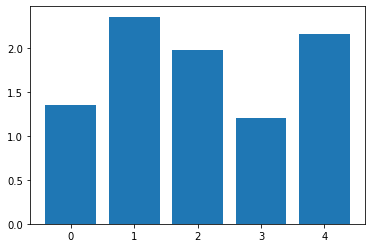

In [22]:
#print(classifier.coef_[0])
importance = classifier.coef_[0]

# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %s, Score: %.5f' % (X_train.columns[i],v))
    
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# confusion matrix

In [23]:
#predictions, y_test
# confusion matrix
from sklearn.metrics import confusion_matrix as cm
predictions, y_test
cm = cm(y_test, predictions)
cm

array([[163,  15],
       [ 13,  89]], dtype=int64)

(2, 0)

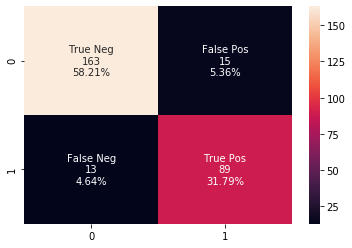

In [24]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
ax = sns.heatmap(cm, annot=labels, fmt="", )
ax.set_ylim(2,0)